# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Importing dataset

In [2]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

# Exploring dataset

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe().round(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,...,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


In [7]:
df.duplicated().sum()

1081

since there are duplicated values, so dropping them

In [8]:
df.drop_duplicates(df,inplace=True)

In [9]:
df.shape

(283726, 31)

# Visualization

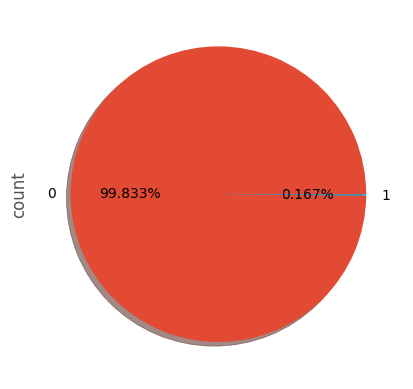

In [10]:
df["Class"].value_counts().plot(kind= "pie",autopct='%1.3f%%', shadow = True)
plt.show()
# 0 means no fraud and 1 is fraud

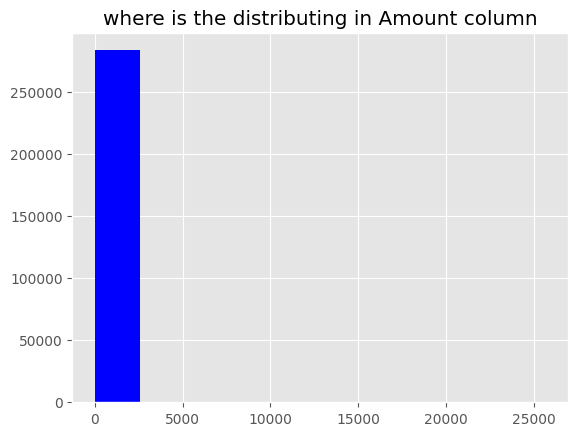

In [11]:
plt.hist (data= df, x="Amount", color = 'blue')
plt.title("where is the distributing in Amount column")
plt.show()

In [12]:
df["Amount"].sort_values(ascending=False).head(10)

274771    25691.16
58465     19656.53
151296    18910.00
46841     12910.93
54018     11898.09
169457    11789.84
284249    10199.44
227921    10000.00
74699      8790.26
245474     8787.00
Name: Amount, dtype: float64

# Building ML Model -> Classification

In [13]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import  classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC

In [14]:
X = df.drop(columns="Class")           
y = df["Class"]    # y = class

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (212794, 30)
X Test  :  (70932, 30)
Y Train :  (212794,)
Y Test  :  (70932,)


In [15]:
LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
SVC=SVC()

In [16]:
li = [LR,DTR,RFR,KNR,SVC,MLP]

for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",classification_report(y_test,ypred))
    print("********************************************")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.77      0.64      0.70       112

    accuracy                           1.00     70932
   macro avg       0.89      0.82      0.85     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
DecisionTreeClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.72      0.74      0.73       112

    accuracy                           1.00     70932
   macro avg       0.86      0.87      0.87     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
RandomForestClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.97      0.74      0.84       112

    accuracy   

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.00      0.00      0.00       112

    accuracy                           1.00     70932
   macro avg       0.50      0.50      0.50     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
MLPClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.52      0.76      0.62       112

    accuracy                           1.00     70932
   macro avg       0.76      0.88      0.81     70932
weighted avg       1.00      1.00      1.00     70932

********************************************


In [17]:
from sklearn.feature_selection import SelectPercentile

In [18]:
F_50 = SelectPercentile( percentile= 50)

In [19]:
set_X = F_50.fit_transform(X,y)

In [20]:
new_x =pd.DataFrame(set_X,columns= [ i for i,j in zip (X.columns, F_50.get_support()) if j == True ])
new_x

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981


In [21]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [22]:
X = new_x      
y = df["Class"]    # y = class

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (212794, 15)
X Test  :  (70932, 15)
Y Train :  (212794,)
Y Test  :  (70932,)


In [23]:
li = [LR,DTR,RFR,KNR,SVC,MLP]

for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",classification_report(y_test,ypred))
    print("********************************************")

LogisticRegression() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.90      0.54      0.67       112

    accuracy                           1.00     70932
   macro avg       0.95      0.77      0.83     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
DecisionTreeClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.72      0.67      0.69       112

    accuracy                           1.00     70932
   macro avg       0.86      0.83      0.85     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
RandomForestClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.94      0.73      0.82       112

    accuracy   